In [3]:
from mlhrtds.utils.common import read_yaml, create_directories

In [3]:
import pandas as pd


In [4]:
df = pd.read_csv("/home/anonymous/PycharmProjects/MLOps_heart_disease/artifacts/data_ingestion/data.csv")

In [5]:
# !pip install openpyxl

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
col = ['charges']

In [8]:
X = df.drop(col, axis=1)
y = df[col]

In [12]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
X.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [11]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [7]:
y.dtypes

NameError: name 'y' is not defined

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
num_features

Index(['age', 'bmi', 'children'], dtype='object')

In [13]:
cat_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


In [16]:

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [17]:
X.shape

(1338, 6)

In [18]:
X = preprocessor.fit_transform(X)

In [19]:
X.shape

(1338, 11)

In [21]:
X

array([[ 1.        ,  0.        ,  0.        , ..., -1.43876426,
        -0.45332   , -0.90861367],
       [ 0.        ,  1.        ,  1.        , ..., -1.50996545,
         0.5096211 , -0.07876719],
       [ 0.        ,  1.        ,  1.        , ..., -0.79795355,
         0.38330685,  1.58092576],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -1.50996545,
         1.0148781 , -0.90861367],
       [ 1.        ,  0.        ,  1.        , ..., -1.29636188,
        -0.79781341, -0.90861367],
       [ 1.        ,  0.        ,  0.        , ...,  1.55168573,
        -0.26138796, -0.90861367]])

In [22]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1070, 11), (268, 11))

In [2]:
import pandas as pd

In [21]:
X_train = pd.read_csv("/home/anonymous/PycharmProjects/MLOps_heart_disease/artifacts/data_transformation/X_train.csv")
y_train = pd.read_csv("/home/anonymous/PycharmProjects/MLOps_heart_disease/artifacts/data_transformation/y_train.csv")
X_test = pd.read_csv("/home/anonymous/PycharmProjects/MLOps_heart_disease/artifacts/data_transformation/X_test.csv")
y_test = pd.read_csv("/home/anonymous/PycharmProjects/MLOps_heart_disease/artifacts/data_transformation/y_test.csv")

In [22]:
X_train.shape, y_train.shape

((1003, 11), (1003, 1))

In [23]:
for i in X_train.columns:
    print('Printing column name:')
    print(i)
    print('\/\/\n')
    print('Printing column unique values:')
    print(X_train[i].unique())
    print('============'*5)
    print('============'*5)

Printing column name:
0
\/\/

Printing column unique values:
[-1.08716652 -0.80210593  0.83699246  0.55193187  0.48066672  1.69217422
 -0.08945446 -1.01590137 -1.5147574   0.40940157  0.76572731 -0.37451505
 -1.44349225 -0.3032499   0.12434098 -1.3722271   0.26687128  0.05307584
 -0.23198475  1.47837878  0.69446216  0.33813643  1.26458334 -0.44578019
 -0.65957563 -1.30096196  1.19331819 -0.01818931  1.12205304  0.9082576
 -0.94463622  0.19560613  0.62319701  1.76343937  1.33584849  1.54964393
 -0.51704534  1.0507879  -1.22969681 -0.58831049  0.97952275 -1.15843166
  1.62090907  1.40711363 -0.87337107 -0.1607196  -0.73084078]
Printing column name:
1
\/\/

Printing column unique values:
[-1.14087456e+00 -6.65841523e-01  1.52879447e+00  9.26475874e-01
 -2.68178139e-01 -7.14093565e-01 -1.75733600e+00 -6.98286862e-01
 -6.17589481e-01 -6.60187207e-02 -4.76993012e-01 -3.73001542e-01
  1.39468425e-01  5.30476354e-01 -4.61186309e-01 -5.84312210e-01
 -1.18330308e+00 -7.83975833e-01  5.78728397e-

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [25]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*50)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6087.5329
- Mean Absolute Error: 4189.1030
- R2 Score: 0.7446
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5921.2757
- Mean Absolute Error: 4235.8932
- R2 Score: 0.7676


Lasso
Model performance for Training set
- Root Mean Squared Error: 6083.1333
- Mean Absolute Error: 4182.9940
- R2 Score: 0.7450
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5926.1288
- Mean Absolute Error: 4243.6301
- R2 Score: 0.7673


Ridge
Model performance for Training set
- Root Mean Squared Error: 6083.1359
- Mean Absolute Error: 4183.4797
- R2 Score: 0.7450
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5926.2177
- Mean Absolute Error: 4244.1500
- R2 Score: 0.7672


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4543.1863
- Mean Absolute Error: 2739.4164


/home/anonymous/PycharmProjects/MLOps_heart_disease/sommy/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1842.7497
- Mean Absolute Error: 1023.7812
- R2 Score: 0.9766
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4798.5212
- Mean Absolute Error: 2613.8424
- R2 Score: 0.8474


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 808.0588
- Mean Absolute Error: 426.7293
- R2 Score: 0.9955
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4963.1004
- Mean Absolute Error: 2805.3551
- R2 Score: 0.8368




/home/anonymous/PycharmProjects/MLOps_heart_disease/sommy/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/anonymous/PycharmProjects/MLOps_heart_disease/sommy/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/anonymous/PycharmProjects/MLOps_heart_disease/sommy/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/anonymous/PycharmProjects/MLOps_heart_disease/sommy/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is

CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 2538.7636
- Mean Absolute Error: 1419.8889
- R2 Score: 0.9556
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4678.7264
- Mean Absolute Error: 2583.4480
- R2 Score: 0.8549


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 4806.1990
- Mean Absolute Error: 3797.5834
- R2 Score: 0.8408
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5202.8901
- Mean Absolute Error: 4138.3418
- R2 Score: 0.8206




/home/anonymous/PycharmProjects/MLOps_heart_disease/sommy/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.854925
5,Random Forest Regressor,0.847401
6,XGBRegressor,0.836754
8,AdaBoost Regressor,0.820599
3,K-Neighbors Regressor,0.796168
0,Linear Regression,0.767637
1,Lasso,0.767256
2,Ridge,0.767249
4,Decision Tree,0.757554


In [30]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 78.41


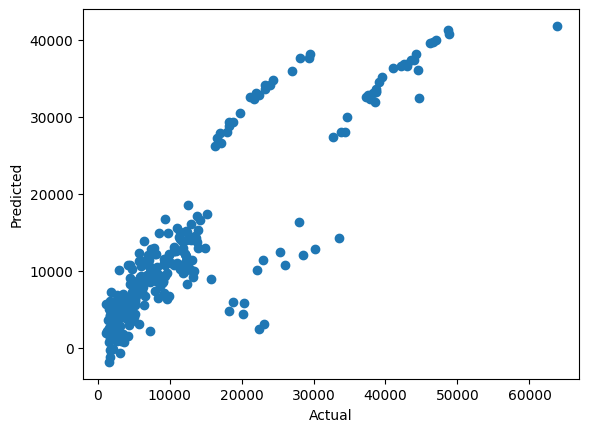

In [31]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

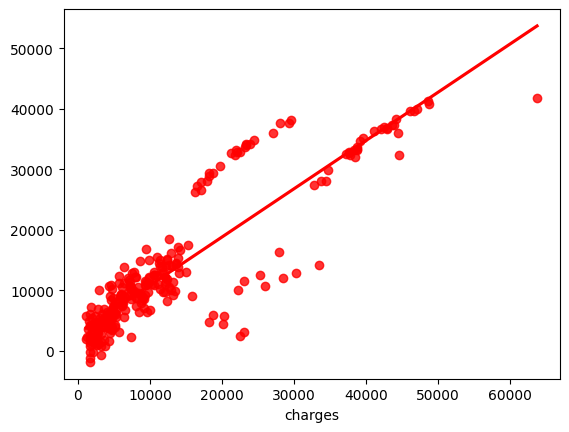

In [32]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [33]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

ValueError: Per-column arrays must each be 1-dimensional